# Machine Learning 

### This Script contains the following:
#### 01. Importing Libraries and Data 
#### 02. Data Cleaning
#### 03. Data prep for Regression Analysis
#### 04. Regression Analysis
#### 05. Export the Data.

## 01. Importing Libraries and Data 

In [3]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
# defing path
path = r'/Users/Ayaz/Desktop/Boat Sales Analysis'

In [6]:
# Importing data.
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_boats_sales.csv'), index_col = False)

In [7]:
# Display all rows without scrolling.
pd.set_option('display.max_rows', None)

## 02. Data Cleaning 

In [8]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,boat_type,manufacturer,type,year_built,length,width,material,views_last_7_days,currency,value,value_in_eur,country
0,0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,unknown,226,CHF,3337,3337.0,Switzerland
1,1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany
2,2,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,unknown,64,DKK,25900,3367.0,Denmark
3,3,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany
4,4,6,Catamaran,unknown,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,CHF,3600,3600.0,Switzerland
5,5,8,Fishing Boat,Crescent power boats,new boat from stock,2019,3.64,1.37,unknown,45,EUR,3333,3333.0,Germany
6,6,9,Pontoon Boat,Whaly power boats,new boat from stock,2018,4.35,1.73,unknown,180,EUR,3300,3300.0,Italy
7,7,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,CHF,3500,3500.0,Switzerland
8,8,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,EUR,3500,3500.0,Italy
9,9,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,CHF,4600,4600.0,Switzerland


In [9]:
# Drop the specified columns
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [10]:
df.shape

(9192, 12)

### Missing values

In [11]:
# checking for missing values in dataframe
df.isnull().sum()
# No missing values.

boat_type            0
manufacturer         0
type                 0
year_built           0
length               0
width                0
material             0
views_last_7_days    0
currency             0
value                0
value_in_eur         0
country              0
dtype: int64

### Duplicates check

In [12]:
# checking for Duplicates in dataframe
dups = df.duplicated()

In [13]:
df.shape

(9192, 12)

In [15]:
dups.shape
# No duplicates were found.

(9192,)

### Extreme values checks

/var/folders/44/7xyg5dc91nb96tdj20w49k0r0000gp/T/ipykernel_49441/4191407604.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['value_in_eur'], bins=70) # Shows extreme values


<Axes: xlabel='value_in_eur', ylabel='Density'>

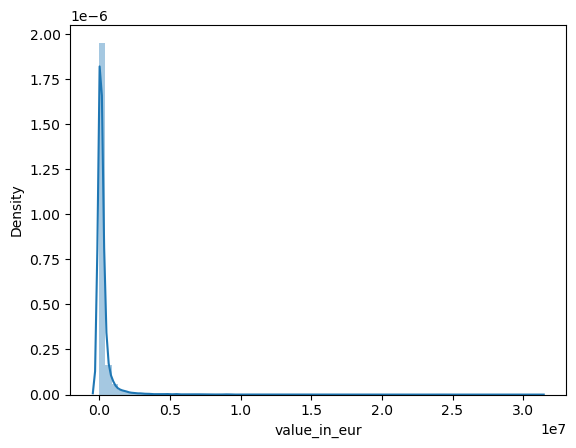

In [18]:
sns.distplot(df['value_in_eur'], bins=70) # Shows extreme values


/var/folders/44/7xyg5dc91nb96tdj20w49k0r0000gp/T/ipykernel_49441/578365260.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['views_last_7_days'], bins=25) # Shows extreme values


<Axes: xlabel='views_last_7_days', ylabel='Density'>

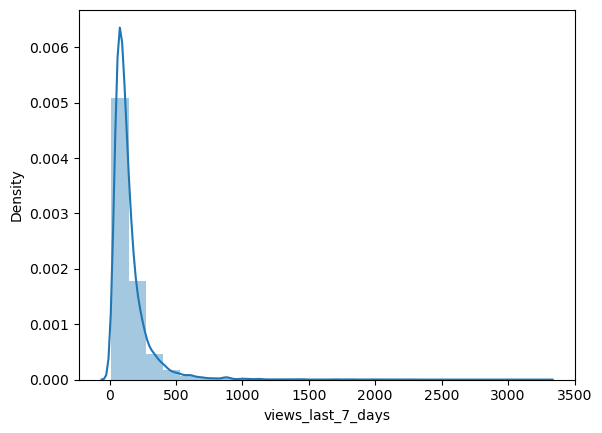

In [19]:
sns.distplot(df['views_last_7_days'], bins=25) # Shows extreme values

/var/folders/44/7xyg5dc91nb96tdj20w49k0r0000gp/T/ipykernel_49441/1126373353.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year_built'], bins=25) # Shows extreme values


<Axes: xlabel='year_built', ylabel='Density'>

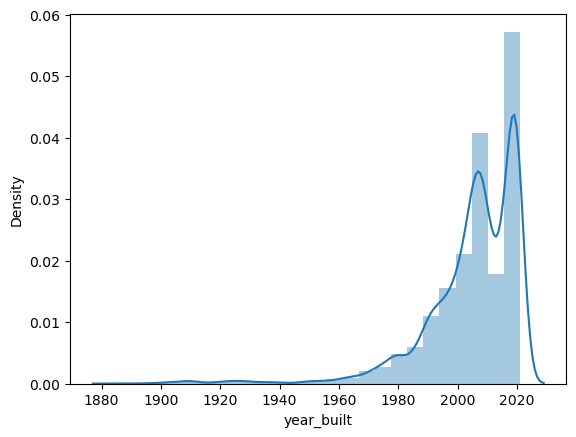

In [20]:
sns.distplot(df['year_built'], bins=25) # Shows extreme values

/var/folders/44/7xyg5dc91nb96tdj20w49k0r0000gp/T/ipykernel_49441/3248100109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length'], bins=25) # Shows extreme values


<Axes: xlabel='length', ylabel='Density'>

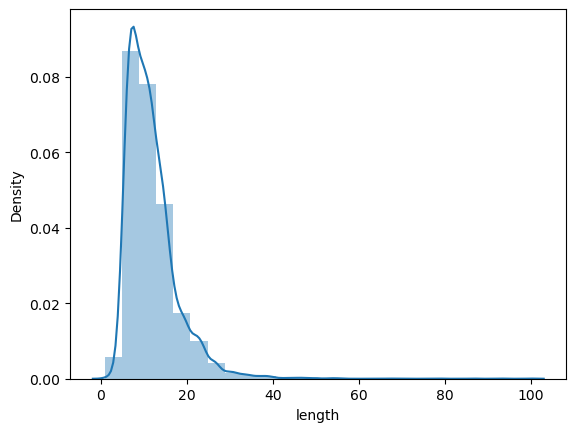

In [21]:
sns.distplot(df['length'], bins=25) # Shows extreme values

In [26]:
df['value_in_eur'].mean() # Check the mean

301799.16784377716

In [27]:
df['value_in_eur'].median() # Check the median

95829.5

In [28]:
df['value_in_eur'].max() # Check the max

31000000.0

## 03. Data prep for regression analysis

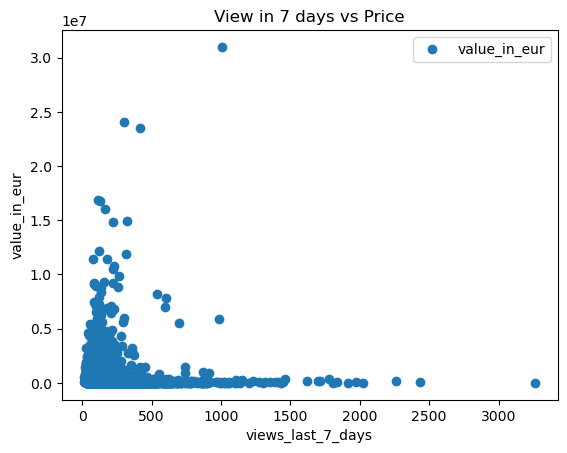

In [29]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'views_last_7_days', y='value_in_eur',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('View in 7 days vs Price')  
plt.xlabel('views_last_7_days')  
plt.ylabel('value_in_eur')  
plt.show()

### Hypothesis

Lower-priced boats get more views. price goes down, the views go up.

In [30]:
# 1. reshape to arrays to use sklearn library
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['views_last_7_days'].values.reshape(-1,1)
y = df['value_in_eur'].values.reshape(-1,1)

In [31]:
# check to see if array
X

array([[226],
       [ 75],
       [ 64],
       ...,
       [354],
       [266],
       [194]])

In [32]:
y

array([[3337.],
       [3490.],
       [3367.],
       ...,
       [4499.],
       [4300.],
       [3780.]])

In [33]:
# Split the data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04. Regression Analysis

In [34]:
# Create a regression object.

regression = LinearRegression()

In [35]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [36]:
# predict y with X test data
y_predicted = regression.predict(X_test)


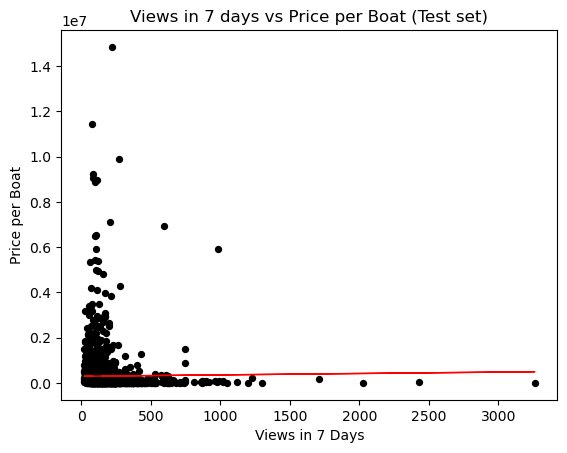

In [37]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='black', s = 18)
plot_test.plot(X_test, y_predicted, color='red', linewidth = 1)
plot_test.title('Views in 7 days vs Price per Boat (Test set)')
plot_test.xlabel('Views in 7 Days')
plot_test.ylabel('Price per Boat')
plot_test.show()

In [38]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [39]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[61.39934726]]
Mean squared error:  594799535839.0441
R2 score:  -0.001760916000020929


### Interpretation:

Slope Coefficient: The change in the dependent variable for a one-unit change in the independent variable is represented by the slope value of about 61.4. It denotes the size and direction of the link between the variables.

Mean Squared Error(MSE): The average squared difference between expected and actual values is measured by the mean squared error (MSE). A high MSE score, such as 594,799,535,839.04, indicates a poor fit of the model to the data, meaning significant prediction errors.

R2 Score: The R-squared (R2) score of around -0.00176 reflects the regression model's quality of fit. A low R2 value indicates that the model performs poorly and does not explain the data variation. It denotes a very weak or non-existent linear relationship between the variables in this scenario.

Overall, the findings indicate that the linear regression model used does not give a good fit for the data, as evidenced by the high MSE and negative R2 score, implying that the model's predictions are inaccurate or useless. To better comprehend the data, more analysis or a different model may be required.


In [40]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,35000.0,306476.247540
1,14950.0,321703.285660
2,885000.0,301441.501065
3,4900.0,309976.010334
4,65000.0,343008.859159
5,949000.0,305493.857984
6,24500.0,318326.321561
7,39170.0,313844.169211
8,69000.0,304327.270386
9,119600.0,302915.085399


### Thoughts on model performance:
The model performed poorly on the test set. The high mean squared error (MSE) and negative R-squared (R2) score indicate that the model's predictions had significant errors and failed to explain the variance in the test data, suggesting that it doesn't fit the data well and is not a reliable predictor.

## 05. Export Dataframe

In [41]:
# Export dataframe as csv file.
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'df_boats_sales.csv'))